In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#defining column names 
columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

In [3]:
#reading .data files into a dataframe and making a copy of it
df = pd.read_csv('./auto-mpg.data', names = columns, na_values = "?", comment = '\t', sep = " ", skipinitialspace = True)

data = df.copy()

# Exploratory Data Analysis

In [4]:
#Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
#Check for null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
#horspower column is missing 6 values

In [7]:
#Summary of statistics of variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


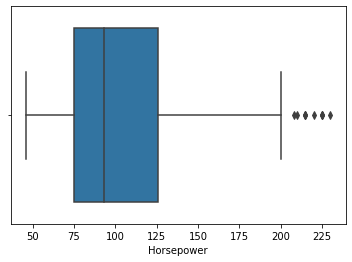

In [8]:
sns.boxplot(x=data['Horsepower'])

In [9]:
#Some outliers noted. Missing values will be substituited with the median value
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [11]:
#Categorty distributions
data['Cylinders'].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [12]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

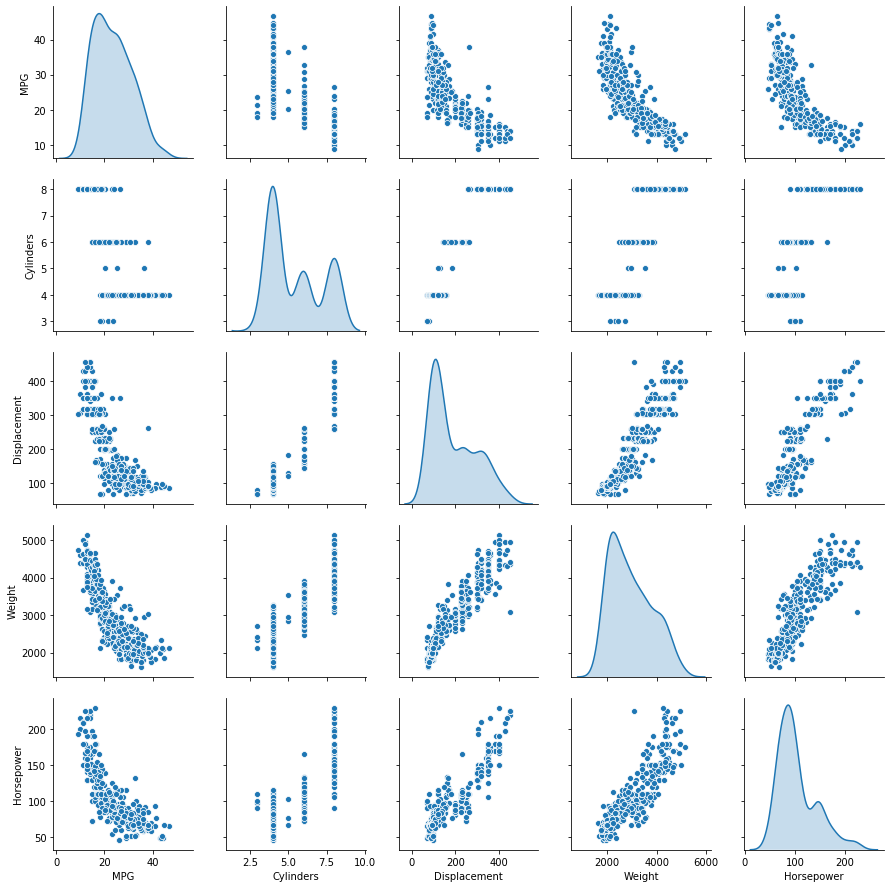

In [13]:
#Plot for correlation
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind = "kde")

In [14]:
#Observations: MPG is negatively correlated with increasing displacement, weight, and horsepower

In [15]:
#set aside test data via stratified sampling (homogeneous group with thee right number of instances of each sub-group). From the correlation above, the cylinder column can be used to create the strata

from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [17]:
#check distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [18]:
#check distribution of the testing set
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [19]:
#Convert Origin column from discrete value to country
strat_train_set['Origin'] = strat_train_set['Origin'].map({1: 'India', 2: 'USA', 3: 'Germany'})
strat_train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
289,16.9,8,350.0,155.0,4360.0,14.9,79,India
4,17.0,8,302.0,140.0,3449.0,10.5,70,India
373,24.0,4,140.0,92.0,2865.0,16.4,82,India
262,19.2,8,305.0,145.0,3425.0,13.2,78,India
242,21.5,4,121.0,110.0,2600.0,12.8,77,USA
32,25.0,4,98.0,93.5,2046.0,19.0,71,India
282,22.3,4,140.0,88.0,2890.0,17.3,79,India
88,14.0,8,302.0,137.0,4042.0,14.5,73,India
34,16.0,6,225.0,105.0,3439.0,15.5,71,India
67,11.0,8,429.0,208.0,4633.0,11.0,72,India


In [20]:
#hot enconding the Orijgin column
strat_train_set = pd.get_dummies(strat_train_set, prefix = '', prefix_sep = '')
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


In [21]:
#testing new variables by checking correlation w.r.t MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cylinder'] = data['Acceleration'] / data['Cylinders']

In [22]:
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending = False)

MPG                         1.000000
acceleration_on_cylinder    0.732133
acceleration_on_power       0.704240
Model Year                  0.579267
Origin                      0.563450
Acceleration                0.420289
weight_on_cylinder         -0.020778
displacement_on_power      -0.577236
Horsepower                 -0.773453
Cylinders                  -0.775396
Displacement               -0.804203
Weight                     -0.831741
Name: MPG, dtype: float64

In [23]:
#observations: acceleration_on_power and acceleration_on_cylinder has high correlation

# Data Preparation

In [24]:
#One hot enconding categorial values
from sklearn.preprocessing import OneHotEncoder

In [28]:
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot 

NameError: name 'data_cat' is not defined

In [26]:
data_cat_1hot.toarray() [:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])